## 7.9　トピックモデリングと文書クラスタリング

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
path = '/content/drive/MyDrive/working'

In [2]:
# !pip install mglearn

In [3]:
import re
import nltk
import spacy
import mglearn
import warnings
import numpy as np
from spacy.tokens import Doc
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (5, 5)

In [5]:
loaded_data = {}

for name, cast in [('text_train', str), ('y_train', int), ('text_test', str), ('y_test', int),]:
    with open(f'{path}/{name}.txt', 'r', encoding='utf-8') as f:
        loaded_data[name] = [cast(line.strip()) for line in f]

text_train = loaded_data['text_train']
y_train = loaded_data['y_train']
text_test = loaded_data['text_test']
y_test = loaded_data['y_test']

In [6]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [7]:
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [8]:
lda.components_.shape

(10, 10000)

In [9]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [10]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
family        music         comedy        world         funny         
father        role          role          war           thing         
young         musical       cast          us            worst         
girl          cast          performance   american      didn          
mother        performance   actor         our           nothing       
woman         songs         plays         own           actually      
wife          song          john          history       want          
old           dance         played        documentary   10            
son           play          james         real          guy           
home          comedy        funny         human         re            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [11]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [12]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
werewolf      rock          tony          rape          ted           musical       paul          
vampire       chris         al            richard       john          song          alan          
moon          ring          accent        lynch         barbara       music         kevin         
bat           taylor        gary          doctor        bill          dance         verhoeven     
stephen       jones         american      hardy         stanwyck      songs         hollow        
grey          down          pacino        stan          robert        dancing       director      
wolf          roberts       gangster      straight      sally         singing       thomas        
village       sandra        cooper        laurel        code          numbers       campbell      
zone      

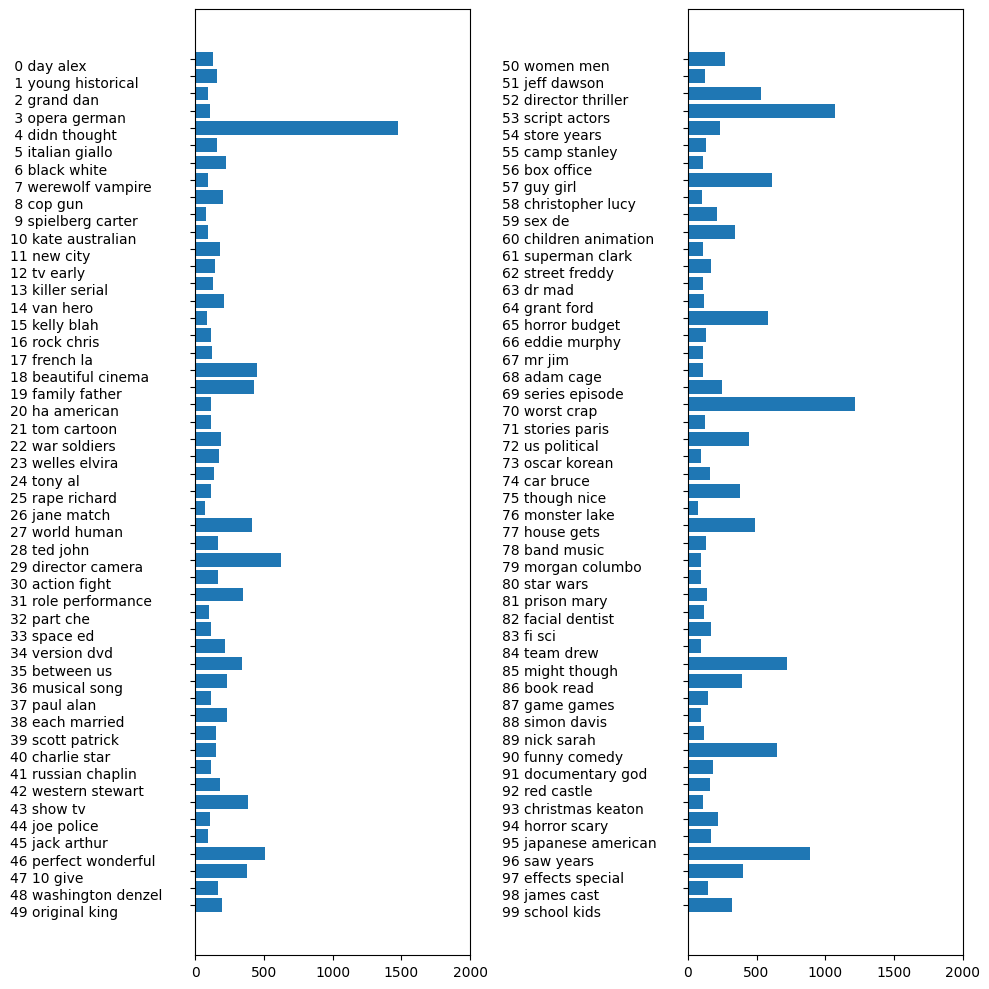

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()